# Clustering

In [1]:
import numpy as np
np.random.seed(42)
from sklearn.datasets import load_iris
from plotting import plot
import matplotlib.pyplot as plt

In [2]:
dataset = load_iris()
x, y = dataset.data[:, :2], dataset.target

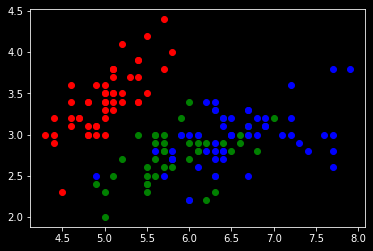

In [3]:
colors = ['red', 'green', 'blue']
for idx, point in enumerate(x):
    plt.scatter(point[0], point[1], color = colors[y[idx]])
plt.show()

In [4]:
class KMeans:
    def __init__(self, n_clusters: int = 8, max_iter: int = 3_000):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids_ = None

    def fit(self, x: np.ndarray):  
        rand_idxs = np.random.permutation(len(x))[:self.n_clusters] 
            # Hier beginnen wir bei einem zufälligen Punkt des Datensatzes
            # Nimm z.B. n_clusters = 3 zufällige Punkte aus dem Datensatz
        self.centroids_ = x[rand_idxs]

        for _ in range(self.max_iter):
            self.assigment = {
                i: [] for i in range(self.n_clusters) # Legt für jeden Cluster eine Liste an
            } 
            # Step 1: Assignment --> Welcher Punkt gehört zu welchem Zentrum/Centroid?
            for xi in x:
                distance_to_centroids = np.array( # Abstände der Centroids zu den Punkten
                    [np.linalg.norm(xi - centroid) for centroid in self.centroids_]
                )
                closest_centroid_idx = np.argmin(distance_to_centroids) # Welcher Centroid ist am nächsten dran?
                self.assigment[closest_centroid_idx].append(xi)
                # Step 2: Update des Centroids --> Centroid in die Mitte der zugewiesenen Punkte verschieben
                for cluster_idx in range(self.n_clusters):
                    if len(self.assigment[cluster_idx]) > 0:
                        self.centroids_[cluster_idx] = np.mean(self.assigment[cluster_idx], axis = 0)


    def predict(self, x: np.ndarray):
        y_pred = np.zeros(shape = len(x))
        for idx, xi in enumerate(x):
            distance_to_centroids = np.array( # Abstände der Centroids zu den Punkten
                [np.linalg.norm(xi - centroid) for centroid in self.centroids_]
            )
            closest_centroid_idx = np.argmin(distance_to_centroids)
            y_pred[idx] = closest_centroid_idx
        return y_pred

    def score(self, x: np.ndarray):
        pass

In [10]:
kmeans = KMeans(n_clusters = 3, max_iter = 1_000)
kmeans.fit(x)
y_pred = kmeans.predict(x).astype(int)

print(kmeans.centroids_)
print(y_pred)

[[6.44698795 2.92891566]
 [5.272      3.696     ]
 [4.99047619 2.93095238]]
[1 2 2 2 1 1 2 1 2 2 1 2 2 2 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1 2 2 1 1 1 2 2 1
 1 2 1 1 2 2 1 1 2 1 2 1 2 0 0 0 2 0 2 0 2 0 2 2 0 0 0 2 0 2 0 0 2 0 0 0 0
 0 0 0 0 0 2 2 2 0 0 2 0 0 0 2 2 2 0 0 2 2 2 2 0 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


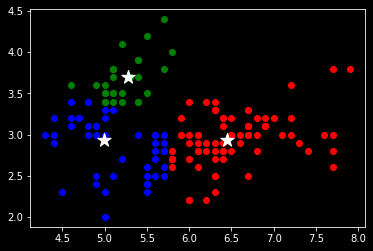

In [11]:
colors = ['red', 'green', 'blue']

for idx, point in enumerate(x):
    plt.scatter(point[0], point[1], color = colors[y_pred[idx]], marker = 'o')
for centroid in kmeans.centroids_:
    plt.scatter(centroid[0], centroid[1], color = 'white', marker = '*', s = 200)
plt.show()

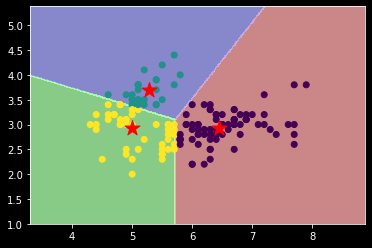

In [12]:
plot(x, y, y_pred, kmeans.centroids_, kmeans)